---
<h3><center>PREDICTING HOUSE PRICES : A Regression Example</center></h3>
---


<h3>Problem Statement :</h3>
---
Predict median prices of homes in a given Boston suburb(Area where people live that is outside the central part of the city) in the mid 1970's given the data points such as crime rate, the local property tax rates etc.

Dataset : Boston Housing Price 

Type of problem : Regression 

---


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h4>1. LOADING THE DATASET</h4>

In [2]:
# Loading the Boston housing dataset
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets) , (test_data, test_targets) = boston_housing.load_data()

In [4]:
print("Number of sample available in train dataset is {}".format(train_data.shape[0]))

print("Number of features available in train dataset is {}".format(train_data.shape[1]))

print("Number of sample available in test dataset is {}".format(test_data.shape[0]))

print("Number of features available in test dataset is {}".format(test_data.shape[1]))

Number of sample available in train dataset is 404
Number of features available in train dataset is 13
Number of sample available in test dataset is 102
Number of features available in test dataset is 13


<h4>2. EDA</h4>

In [5]:
print("Max price of house {}".format(max(train_targets)))

print("Min price of house {}".format(min(train_targets)))

Max price of house 50.0
Min price of house 5.0


<p>Observations :<p>
    

* These prices are typically between \\$ 5,000 and \\$ 50,000. If it sounds cheap, remember that the data is of mid-1970s, and these prices aren't just adjusted for inflation.
* It would be problamatic to feed into a neual network values that take widely different ranges. Therefore computing feature wise normalization.

    For each feature in input data:

    Do subtract the mean of the feature & divide by standard deviation so that feature is centered around 0 and has a unit 
    standard deviation.

In [6]:
# Preparing the data (Normalization) : To make learning of network easier

mean = train_data.mean(axis=0)

train_data -= mean

std = train_data.std(axis=0)

train_data /= std

test_data -= mean

test_data /= std

print("Mean : \n {0}".format(mean))

print("Standard Deviation : \n {0}".format(std))

Mean : 
 [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
Standard Deviation : 
 [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


<h4>3. BUILDING NETWORK</h4>

Since very few samples are available in dataset we will build a small network(to mitigate overfitting) with only two hidden layers(with 64 units each). In general, the less training data we have, the worse the overfitting will be.

In [7]:
#! pip install tensorflow --upgrade

In [8]:
# Building Network 
from keras import models
from keras import layers

In [9]:
def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(1))
    
    # mse = (target - prediction)^2 , mae = abs(target - prediction)
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mean_absolute_error']) 
    
    return model

<h4> Concept behind building above model : </h4>

The network ends with single unit with no activation function, since this problem is a scalar regression problem(a regression where we are trying to predict a single continuous value). 

Applying an activaton function would constraint the range of output. For example if we had used sigmoid as activation function
to the last layer the network could learn to predict values between 0 and 1.

Hence we have taken linear layer so that network can predict values in any range.

<b>Loss Function:<b>
    
Here we have take loss as Mean Squared Error(MSE) = (Targets - Predictions)^2 , which is widely used among regression problems.

<b>Monitoring Metric:<b>
    
Mean Absolute Error(MAE) is used as monitoring metric which is equivalent to abs(Predictions - Targets)

Example:
MAE of 0.6 for this problem is would mean that our predictions are off by \\$600 on average.

In [10]:
base_model = build_model()

# fit the model
base_model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1)

loss, test_mse_score, test_mae_score = base_model.evaluate(test_data, test_targets) 

Epoch 1/80
26/26 [==============================] - 1s 2ms/step - loss: 483.9377 - mae: 19.9624 - mean_absolute_error: 19.9624
Epoch 2/80
26/26 [==============================] - 0s 3ms/step - loss: 298.7777 - mae: 15.0347 - mean_absolute_error: 15.0347
Epoch 3/80
26/26 [==============================] - 0s 2ms/step - loss: 134.8638 - mae: 9.0483 - mean_absolute_error: 9.0483
Epoch 4/80
26/26 [==============================] - 0s 2ms/step - loss: 59.7116 - mae: 5.7879 - mean_absolute_error: 5.7879
Epoch 5/80
26/26 [==============================] - 0s 3ms/step - loss: 36.1011 - mae: 4.4449 - mean_absolute_error: 4.4449
Epoch 6/80
26/26 [==============================] - 0s 2ms/step - loss: 26.5361 - mae: 3.7119 - mean_absolute_error: 3.7119
Epoch 7/80
26/26 [==============================] - 0s 3ms/step - loss: 21.8540 - mae: 3.3323 - mean_absolute_error: 3.3323
Epoch 8/80
26/26 [==============================] - 0s 5ms/step - loss: 18.6554 - mae: 3.1114 - mean_absolute_error: 3.1114
E

26/26 [==============================] - 0s 2ms/step - loss: 6.7184 - mae: 1.8478 - mean_absolute_error: 1.8478
Epoch 67/80
26/26 [==============================] - 0s 2ms/step - loss: 6.8220 - mae: 1.8223 - mean_absolute_error: 1.8223
Epoch 68/80
26/26 [==============================] - 0s 2ms/step - loss: 6.8282 - mae: 1.8567 - mean_absolute_error: 1.8567
Epoch 69/80
26/26 [==============================] - 0s 3ms/step - loss: 6.6701 - mae: 1.8241 - mean_absolute_error: 1.8241
Epoch 70/80
26/26 [==============================] - 0s 5ms/step - loss: 6.5824 - mae: 1.8042 - mean_absolute_error: 1.8042
Epoch 71/80
26/26 [==============================] - 0s 3ms/step - loss: 6.4899 - mae: 1.8117 - mean_absolute_error: 1.8117
Epoch 72/80
26/26 [==============================] - 0s 2ms/step - loss: 6.6355 - mae: 1.8415 - mean_absolute_error: 1.8415
Epoch 73/80
26/26 [==============================] - 0s 2ms/step - loss: 6.3577 - mae: 1.7899 - mean_absolute_error: 1.7899
Epoch 74/80
26/26 [=

If let's say MAE is 0.5 for this problem that means our predictions is off by $500 on an average

In [11]:
test_mae_score 

2.6129815578460693

In [12]:
test_mse_score

2.6129815578460693

<h4>3.1 Validation using K-fold Approach</h4>

Because we have very few data points available for validation, as a result validation score will change a lot depending on the data points we choose for validation and which we choose for training.

This results is high variance in validation score, which will impact the evaluation of model. Hence using K-fold cross-validation technique. It consists of splitting the dataset into K partitions, and training each one of the K-1 partitions while evaluating on the remaining partition.

The validation score of the model is average of the K validation scores obtained.

Below is an example with K=3

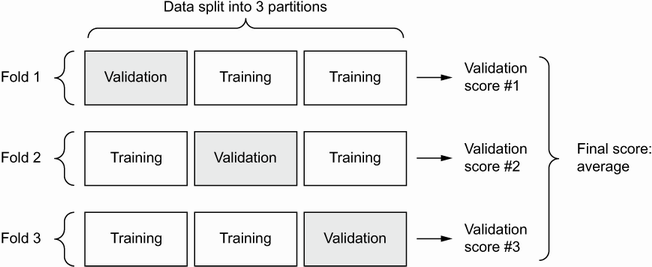

In [13]:
k = 4

num_val_samples = len(train_data) // k

print(num_val_samples)

101


In [14]:
num_epochs = 500

scores = [] # For storing the validation score will take average at the end

for i in range(k):
    
    print("Fold is {}".format(i))
    
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    temp_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis = 0)
    
    temp_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],
                                        axis = 0)
    
    model_2 = build_model()
    
    history = model_2.fit(temp_train_data, temp_train_targets, validation_data=(val_data, val_targets), epochs = num_epochs, 
                          verbose = 0)
    
    #val_mse, val_mae = model_2.evaluate(val_data, val_targets, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    
    #print(mae_history)
    
    scores.append(mae_history)

Fold is 0
Fold is 1
Fold is 2
Fold is 3


In [15]:
avg_mae_history = [np.mean([x[i] for x in scores]) for i in range(num_epochs)]

<h4>3.2 Plotting Validation Scores</h4>

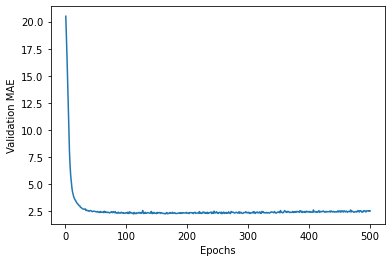

In [16]:
plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)

plt.xlabel('Epochs')

plt.ylabel('Validation MAE')

plt.show()

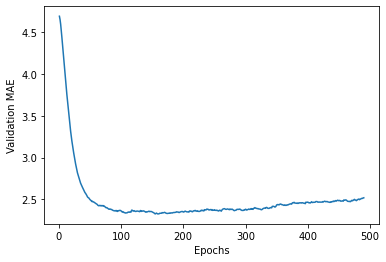

In [17]:
"""
There are scaling issues in above plot , therefore omitting first 10 points which are on different scale
"""
def smooth_curve(points, factor=0.9):
    
    smoothed_points = []
    
    for point in points:
        
        if smoothed_points:
            
            previous = smoothed_points[-1]
            
            smoothed_points.append(previous * factor + point * (1 - factor))
            
        else:
            
            smoothed_points.append(point)
            
    return smoothed_points

smoothed_mae_history = smooth_curve(avg_mae_history[10:])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)

plt.xlabel('Epochs')

plt.ylabel('Validation MAE')

plt.show()

<p>Observation :<p>
According to above plot, validation MAE stops improving significantly after 80 epochs, past that point starts overfitting

In [18]:
#Training the final model
final_model = build_model()

final_model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

loss, test_mse_score, test_mae_score = final_model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 17.1578 - mae: 2.6453 - mean_absolute_error: 2.6453
2.645271062850952


<b>Conclusion :<b> 

We are off by \\$2,600 on average.

<h4>Points learned by this problem:</h4>

1. When features in the input data varies from differnt ranges, each feature should be normalize in order to achieve faster learning.
2. When there is small dataset available , we can use K-fold validation technique to evaluate our model.
3. When small dataset is available, it is prefered to use a small network with few hidden layers to avoid overfitting.